---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [14]:
import networkx as nx
import pandas as pd
import numpy as np
import csv
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [3]:
def answer_one():
        
    # Your Code Here
    
    import csv

    filename = 'Employee_Movie_Choices.txt'

    infile = open(filename, 'r')

    #lines=infile.readlines()[1:]

    lines = csv.reader(infile, delimiter='\t')

    edgelist=[tuple(line) for line in lines][1:]

    infile.close()
    
    # Create the graph object
    G=nx.Graph()
    
    # Load the nodes
    
    G.add_nodes_from(employees, bipartite=0) # employee nodes

    G.add_nodes_from(movies, bipartite=1)  # movie nodes
    
    # Load the edges
    G.add_edges_from(edgelist)
    
    return G

In [4]:
G = answer_one()

In [5]:
# basic information about the graph object
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 19\nNumber of edges: 24\nAverage degree:   2.5263'

<IPython.core.display.Javascript object>


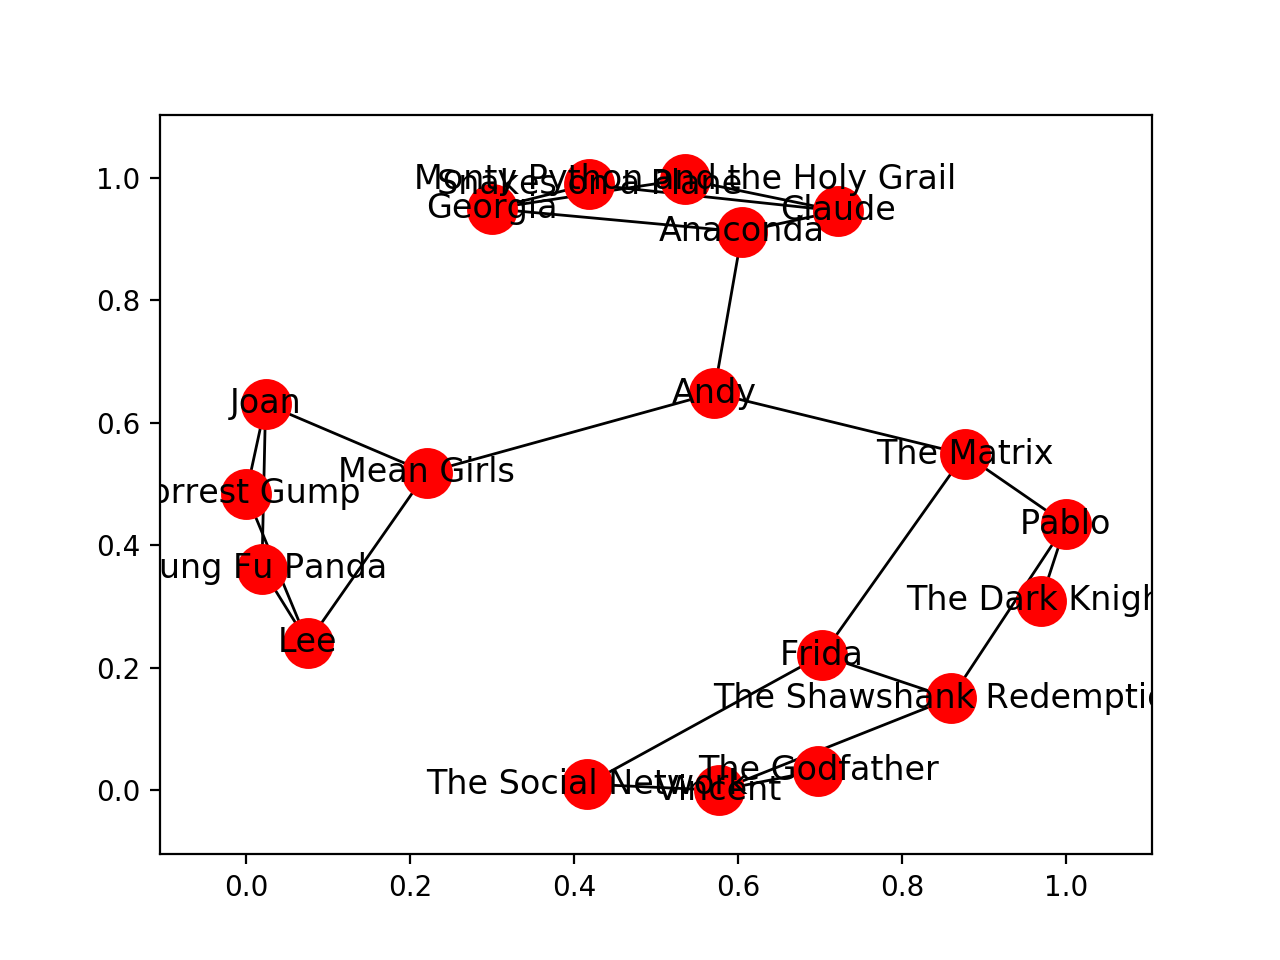

In [6]:
# plot the graph

plot_graph(G)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [7]:
def answer_two():
    for employee in employees:
        G.add_node(employee,type='employee')
        
    for movie in movies:
        G.add_node(movie,type='movie')
        
    return G

In [8]:
G=answer_two()

In [9]:
G.nodes(data=True)

[('Georgia', {'bipartite': 0, 'type': 'employee'}),
 ('Frida', {'bipartite': 0, 'type': 'employee'}),
 ('Lee', {'bipartite': 0, 'type': 'employee'}),
 ('Joan', {'bipartite': 0, 'type': 'employee'}),
 ('Claude', {'bipartite': 0, 'type': 'employee'}),
 ('Pablo', {'bipartite': 0, 'type': 'employee'}),
 ('Andy', {'bipartite': 0, 'type': 'employee'}),
 ('Vincent', {'bipartite': 0, 'type': 'employee'}),
 ('The Godfather', {'bipartite': 1, 'type': 'movie'}),
 ('The Social Network', {'bipartite': 1, 'type': 'movie'}),
 ('Forrest Gump', {'bipartite': 1, 'type': 'movie'}),
 ('The Matrix', {'bipartite': 1, 'type': 'movie'}),
 ('Kung Fu Panda', {'bipartite': 1, 'type': 'movie'}),
 ('The Shawshank Redemption', {'bipartite': 1, 'type': 'movie'}),
 ('Anaconda', {'bipartite': 1, 'type': 'movie'}),
 ('Monty Python and the Holy Grail', {'bipartite': 1, 'type': 'movie'}),
 ('The Dark Knight', {'bipartite': 1, 'type': 'movie'}),
 ('Snakes on a Plane', {'bipartite': 1, 'type': 'movie'}),
 ('Mean Girls', {'

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [10]:
def answer_three():
        
    P=bipartite.weighted_projected_graph(G, employees)
    
    return P

In [11]:
P=answer_three()

P.edges(data=True)

[('Georgia', 'Claude', {'weight': 3}),
 ('Georgia', 'Andy', {'weight': 1}),
 ('Frida', 'Vincent', {'weight': 2}),
 ('Frida', 'Pablo', {'weight': 2}),
 ('Frida', 'Andy', {'weight': 1}),
 ('Lee', 'Joan', {'weight': 3}),
 ('Lee', 'Andy', {'weight': 1}),
 ('Joan', 'Andy', {'weight': 1}),
 ('Claude', 'Andy', {'weight': 1}),
 ('Pablo', 'Vincent', {'weight': 1}),
 ('Pablo', 'Andy', {'weight': 1})]

<IPython.core.display.Javascript object>


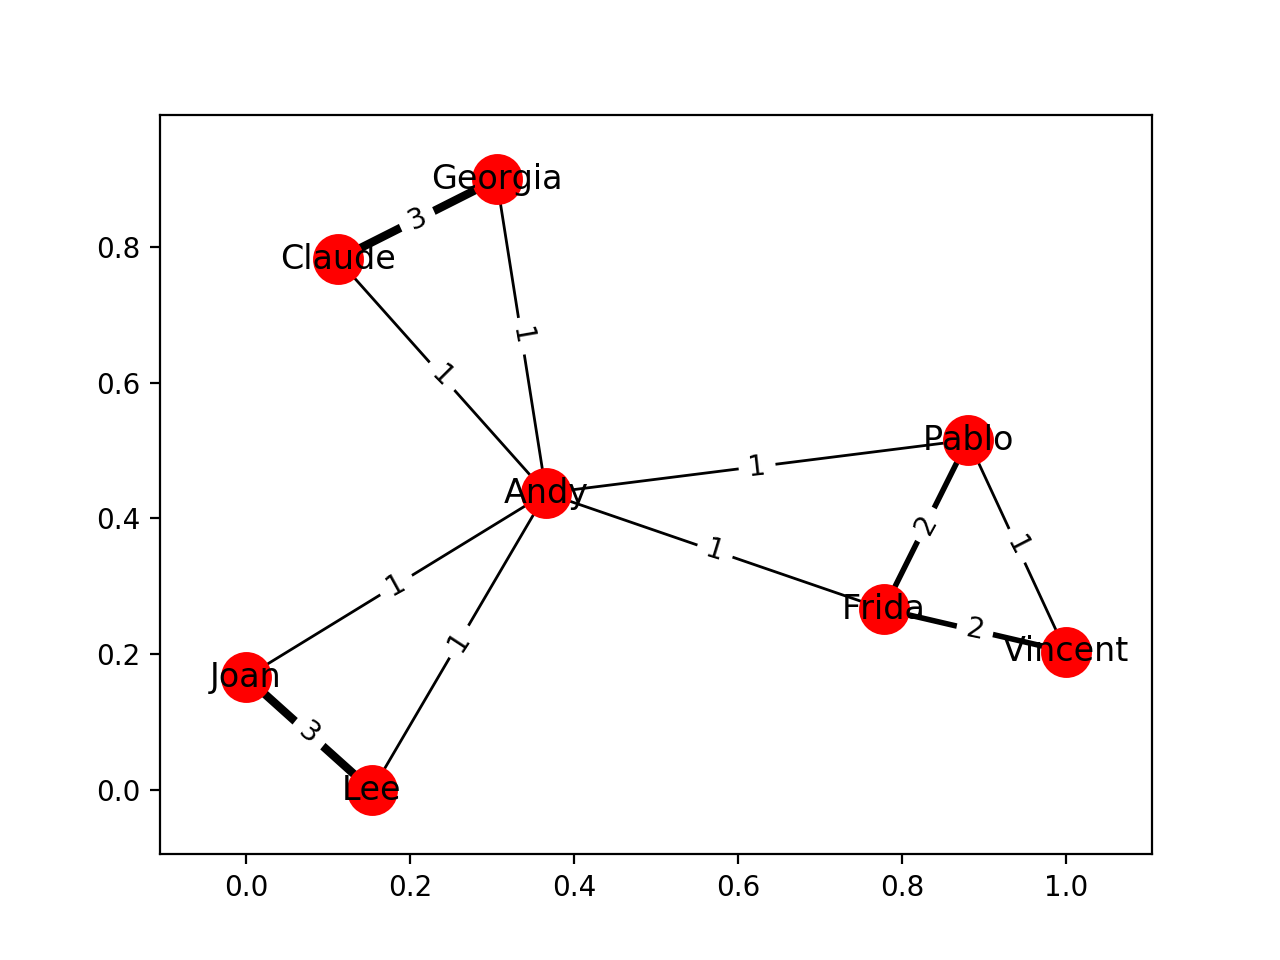

In [12]:
plot_graph(P, weight_name='weight')

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [115]:
def answer_four():
    filename='Employee_Relationships.txt'

    infile=open(filename, 'r')

    lines=csv.reader(infile, delimiter='\t')

    # add relation attributes to the edges
    for line in lines:
        P.add_edge(line[0], line[1], relation=line[2])
        
    # Add attribute weight=0 to edges without movies in commun

    edges=P.edges()

    for edge in edges:
    
        if 'weight' not in P.edge[edge[0]][edge[1]]:
            P.edge[edge[0]][edge[1]]['weight']=0
            
     # export the edge data to a dataframe

    df_P = pd.DataFrame(P.edges(data=True), columns=['source', 'target', 'info']) 
    #extract variables 'weight' and 'relation' from the dictionary 'info'

    df_P['relation']=df_P['info'].map(lambda x:x['relation'])

    df_P['weight']=df_P['info'].map(lambda x:x['weight'])

    df_P.drop(['info'], axis=1, inplace=True) # drop the variable 'info'
    
    #convert the object datatype into float datatype for relation
    df_P['relation']=df_P['relation'].values.astype(np.float32)
    
    #compute the correlation between 'relationship' and number of commun movies
    result=df_P[['relation','weight']].corr()['relation'][1]
    return result

In [116]:
result=answer_four()

In [117]:
result

0.78839622217334748